# EPC02 
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## ADALINE (Regra Delta)

---

In [45]:
import numpy as np

class Adaline:
    
    def __init__(self, input):
        self.input = input
        self.weights = np.random.rand(self.input.shape[1], )
        
    def activation_function(self, linear_combination):
        """Tomando z = Wx + b, faz a função de ativação bipolar de z"""
        return np.where(linear_combination >= 0, 1, -1)
    
    def predict(self, input_data):
        linear_combination = np.dot(input_data, self.weights)
        return self.activation_function(linear_combination)
        
    def train(self, input_data, labels, error_threshold, learning_rate, max_epoch):
        eqm_atual = 0
        eqm_ant = 1
        epoch = 0
        errors_quadr = []
        eqm_atual_list = []
        while abs(eqm_atual - eqm_ant) > error_threshold and epoch <= max_epoch:
            epoch+=1
            eqm_ant = eqm_atual
            soma_erro = 0
            for single_input, label in zip(input_data, labels):
                output = np.dot(single_input, self.weights)
                error = label - output
                self.weights += learning_rate * error * single_input
                errors_quadr.append(error**2)
                soma_erro += error**2
            eqm_atual = soma_erro/input_data.shape[0]
            eqm_atual_list.append(abs(eqm_atual-eqm_ant))
        return epoch, errors_quadr, eqm_atual_list


In [46]:
# EPC02
training_inputs = np.array([[-1, 0, 1, 1],
                            [-1, 1, 1, 1],
                            [-1, 0, 1, 0],
                            [-1, 1, 1, 0],
                            [-1, 1, 0, 1],
                            [-1, 1, 0, 0],
                            [-1, 0, 0, 1],
                            [-1, 0, 0, 0]])
labels = np.array([-1, -1, 1, 1, -1, 1, -1, 1])
neta = 0.01
epsilon = 0.00001

adaline = Adaline(input=training_inputs)

epoch, errors_quadr, eqm_atual_list = adaline.train(input_data=training_inputs, labels = labels, error_threshold=epsilon, 
                              learning_rate=neta, max_epoch=100)

print(f'Erro quadrático individual: {errors_quadr}\n')
print(f'Número total de épocas: {epoch}\n')
print(f'Lista de todas as eqm_atual: {eqm_atual_list}\n')

Erro quadrático individual: [3.9616489679675775, 4.027173703488615, 0.44575541540225433, 0.3579144950303978, 1.685510646233107, 1.6022912971361214, 1.4955961120845698, 1.727711117579768, 3.5012780753581274, 3.522114764182778, 0.513657125110689, 0.4348577115791084, 1.4398946593023325, 1.688635339085543, 1.2983006982112, 1.7832845067114929, 3.1181095379677424, 3.109436330900574, 0.5727533766941163, 0.5023765708588345, 1.2410827246700746, 1.7555938343924478, 1.1343034556434048, 1.825794221396289, 2.7970355929675694, 2.7700332936119505, 0.6229267851730068, 0.5595559067204002, 1.0791123237372673, 1.8051551480477845, 0.9970925863995231, 1.8567879177653748, 2.526165761237111, 2.489058641638479, 0.664492487773678, 0.6063306505962608, 0.9462871645213315, 1.839349642995172, 0.8815417826098461, 1.8777233747686801, 2.296097958126906, 2.254920085040311, 0.6980225014846096, 0.6431631868280471, 0.836636768894357, 1.8601488371962576, 0.7835978263290687, 1.889944107372646, 2.0993627024572024, 2.0585225

In [47]:
# Teste para os dados com ruídos
ruido = np.random.rand()

inputs = np.array([[-1, 0, 1, 1],
                    [-1, 1, 1, 1],
                    [-1, 0, 1, 0],
                    [-1, 1, 1, 0],
                    [-1, 1, 0, 1],
                    [-1, 1, 0, 0],
                    [-1, 0, 0, 1],
                    [-1, 0, 0, 0]])

input_ruido = inputs + (ruido/5)

adaline.predict(input_ruido)

# Expected label: [-1, -1, 1, 1, -1, 1, -1, 1]

array([-1, -1,  1,  1, -1,  1, -1,  1])

In [72]:
# 1) e 2)

def classe(prediction):
    return "Classe B" if prediction==-1 else "Classe A"

inputs1 = np.array([[-1, 0, 1, 1],
                    [-1, 1, 1, 1],
                    [-1, 0, 1, 0],
                    [-1, 1, 1, 0],
                    [-1, 1, 0, 1],
                    [-1, 1, 0, 0],
                    [-1, 0, 0, 1],
                    [-1, 0, 0, 0],])

inputs2 = np.copy(inputs1)

input_ruido1 = inputs[:8] + (np.random.rand()/5)
input_ruido2 = inputs[:8] + (np.random.rand()/5)

print("             Sinal          Sinal com ruído             Saída    Categoria\n")

for i in range(8):
    print(f'Sinal {i+1} ==> {inputs[i][1:]} | {input_ruido1[i][1:]} | {adaline.predict(input_ruido1)[i]} | {classe(adaline.predict(input_ruido1)[i])}')
    print(f'Sinal {i+1} ==> {inputs[i][1:]} | {input_ruido2[i][1:]} | {adaline.predict(input_ruido2)[i]} | {classe(adaline.predict(input_ruido2)[i])}')

             Sinal          Sinal com ruído             Saída    Categoria

Sinal 1 ==> [0 1 1] | [0.19812172 1.19812172 1.19812172] | -1 | Classe B
Sinal 1 ==> [0 1 1] | [0.16925444 1.16925444 1.16925444] | -1 | Classe B
Sinal 2 ==> [1 1 1] | [1.19812172 1.19812172 1.19812172] | -1 | Classe B
Sinal 2 ==> [1 1 1] | [1.16925444 1.16925444 1.16925444] | -1 | Classe B
Sinal 3 ==> [0 1 0] | [0.19812172 1.19812172 0.19812172] | 1 | Classe A
Sinal 3 ==> [0 1 0] | [0.16925444 1.16925444 0.16925444] | 1 | Classe A
Sinal 4 ==> [1 1 0] | [1.19812172 1.19812172 0.19812172] | 1 | Classe A
Sinal 4 ==> [1 1 0] | [1.16925444 1.16925444 0.16925444] | 1 | Classe A
Sinal 5 ==> [1 0 1] | [1.19812172 0.19812172 1.19812172] | -1 | Classe B
Sinal 5 ==> [1 0 1] | [1.16925444 0.16925444 1.16925444] | -1 | Classe B
Sinal 6 ==> [1 0 0] | [1.19812172 0.19812172 0.19812172] | 1 | Classe A
Sinal 6 ==> [1 0 0] | [1.16925444 0.16925444 0.16925444] | 1 | Classe A
Sinal 7 ==> [0 0 1] | [0.19812172 0.19812172 1.1981217

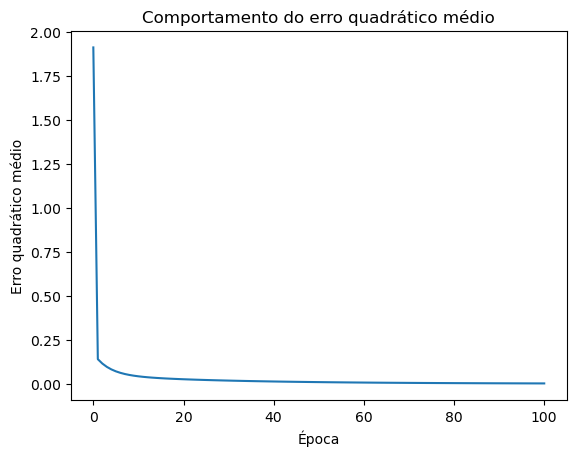

In [73]:
# 3)

import matplotlib.pyplot as plt

x = [i for i in range(epoch)]
y = eqm_atual_list

plt.figure()
plt.xlabel("Época")
plt.ylabel("Erro quadrático médio")
plt.title("Comportamento do erro quadrático médio")
plt.plot(x, y)
plt.show()